In [29]:
from torch.utils.data import DataLoader, Dataset
import torch

class ContrastiveDataset(Dataset):
    def __init__(self, n=10000, num_groups=10):
        self.n = n
        self.num_groups = num_groups
        self.range_size = self.n // self.num_groups
        self.ranges = [
            (self.range_size * i, self.range_size * (i + 1)) for i in range(self.num_groups)
        ]

        # Handle any remaining samples by adding them to the last range
        if self.range_size * self.num_groups < self.n:
            self.ranges[-1] = (self.ranges[-1][0], self.n)

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        anchor = idx

        range_idx = anchor // self.range_size
        if range_idx >= self.num_groups:
            range_idx = self.num_groups - 1  # Correct adjustment

        start, end = self.ranges[range_idx]
        positive_sample = torch.randint(start, end, (1,)).item()

        return (anchor, positive_sample)
    
class Encoder(torch.nn.Module):
    def __init__(self, n):
        super(Encoder, self).__init__()
        self.embedding=torch.nn.Embedding(n, 768)
        self.fc=torch.nn.Linear(768, 768)
        self.non_linearity=torch.nn.Tanh()

    def forward(self, x):
        emb=self.embedding(x)
        out=self.fc(emb)
        out=self.non_linearity(out)
        return out
    
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, z_i, z_j):
        import math
        batch_size = z_i.size(0)
        device = z_i.device

        # Normalize embeddings
        z_i = torch.nn.functional.normalize(z_i, dim=1)
        z_j = torch.nn.functional.normalize(z_j, dim=1)

        # Compute similarity logits
        logits = torch.matmul(z_i, z_j.T) / self.temperature  # Shape: [batch_size, batch_size]

        labels = torch.arange(batch_size).to(device)

        # Cross-entropy loss along rows
        loss_row = torch.nn.functional.cross_entropy(logits, labels)

        # Cross-entropy loss along columns
        loss_col = torch.nn.functional.cross_entropy(logits.T, labels)

        # Total loss
        loss = (loss_row + loss_col) / 2

        return loss

loss=ContrastiveLoss()
    
encoder=Encoder(10000)

# Initialize the dataset
dataset = ContrastiveDataset()

# Initialize DataLoader
dataloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=0)

# Iterate over DataLoader
for batch_idx, batch in enumerate(dataloader):
    #print(f"Batch {batch_idx + 1}: {batch}")
    print(encoder(batch[0]).shape)
    print(loss(encoder(batch[0]), encoder(batch[1])))


torch.Size([10, 768])
tensor(2.3110, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.2086, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.6019, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.3510, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.1868, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.1814, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.4044, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.7736, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.2994, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.6586, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.5113, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.6236, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.5645, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.1454, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.4711, grad_fn=<DivBackward0>)
torch.Size([10, 768])
tensor(2.6361, grad_fn=<DivBackward0>)
torch.Size([10, 768])
te

In [30]:
from torch.utils.data import DataLoader, Dataset
import torch

class ContrastiveDataset(Dataset):
    def __init__(self, n=10000, num_groups=10):
        self.n = n
        self.num_groups = num_groups
        self.range_size = self.n // self.num_groups
        self.ranges = [
            (self.range_size * i, self.range_size * (i + 1)) for i in range(self.num_groups)
        ]

        # Handle any remaining samples by adding them to the last range
        if self.range_size * self.num_groups < self.n:
            self.ranges[-1] = (self.ranges[-1][0], self.n)

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        anchor = idx

        range_idx = anchor // self.range_size
        if range_idx >= self.num_groups:
            range_idx = self.num_groups - 1  # Correct adjustment

        start, end = self.ranges[range_idx]
        positive_sample = torch.randint(start, end, (1,)).item()

        return torch.tensor(anchor, dtype=torch.long), torch.tensor(positive_sample, dtype=torch.long)
    
class Encoder(torch.nn.Module):
    def __init__(self, n):
        super(Encoder, self).__init__()
        self.embedding = torch.nn.Embedding(n, 768)
        self.fc = torch.nn.Linear(768, 768)
        self.non_linearity = torch.nn.Tanh()

    def forward(self, x):
        emb = self.embedding(x)
        out = self.fc(emb)
        out = self.non_linearity(out)
        return out
    
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, z_i, z_j):
        batch_size = z_i.size(0)
        device = z_i.device

        # Normalize embeddings
        z_i = torch.nn.functional.normalize(z_i, dim=1)
        z_j = torch.nn.functional.normalize(z_j, dim=1)

        # Compute similarity logits
        logits = torch.matmul(z_i, z_j.T) / self.temperature  # Shape: [batch_size, batch_size]

        labels = torch.arange(batch_size).to(device)

        # Cross-entropy loss along rows
        loss_row = torch.nn.functional.cross_entropy(logits, labels)

        # Cross-entropy loss along columns
        loss_col = torch.nn.functional.cross_entropy(logits.T, labels)

        # Total loss
        loss = (loss_row + loss_col) / 2

        return loss

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the encoder and move it to the device
encoder = Encoder(10000).to(device)

# Define the optimizer
optimizer = torch.optim.Adam(encoder.parameters(), lr=1e-3)

# Initialize the loss function
criterion = ContrastiveLoss().to(device)

# Initialize the dataset
dataset = ContrastiveDataset()

# Initialize DataLoader
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=0)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    encoder.train()  # Set the encoder to training mode
    total_loss = 0
    for batch_idx, (anchors, positives) in enumerate(dataloader):
        # Move data to device
        anchors = anchors.to(device)
        positives = positives.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        z_i = encoder(anchors)
        z_j = encoder(positives)

        # Compute loss
        loss_value = criterion(z_i, z_j)

        # Backward pass and optimization
        loss_value.backward()
        optimizer.step()

        total_loss += loss_value.item()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


Epoch [1/100], Loss: 5.1904
Epoch [2/100], Loss: 5.2705
Epoch [3/100], Loss: 5.2841
Epoch [4/100], Loss: 5.2472
Epoch [5/100], Loss: 5.2479
Epoch [6/100], Loss: 5.2337
Epoch [7/100], Loss: 5.2484
Epoch [8/100], Loss: 5.2486
Epoch [9/100], Loss: 5.2501
Epoch [10/100], Loss: 5.1953
Epoch [11/100], Loss: 5.1656
Epoch [12/100], Loss: 5.1746
Epoch [13/100], Loss: 5.1281
Epoch [14/100], Loss: 5.1084
Epoch [15/100], Loss: 5.0825
Epoch [16/100], Loss: 5.0854
Epoch [17/100], Loss: 5.0323
Epoch [18/100], Loss: 5.0176
Epoch [19/100], Loss: 4.9291
Epoch [20/100], Loss: 4.8979
Epoch [21/100], Loss: 4.8328
Epoch [22/100], Loss: 4.7292
Epoch [23/100], Loss: 4.6397
Epoch [24/100], Loss: 4.5273
Epoch [25/100], Loss: 4.3690
Epoch [26/100], Loss: 4.2202
Epoch [27/100], Loss: 4.0291
Epoch [28/100], Loss: 3.8031
Epoch [29/100], Loss: 3.6421
Epoch [30/100], Loss: 3.4350
Epoch [31/100], Loss: 3.2823
Epoch [32/100], Loss: 3.1554
Epoch [33/100], Loss: 3.0455
Epoch [34/100], Loss: 2.9733
Epoch [35/100], Loss: 2

In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
# After training, encode all 10,000 indices
encoder.eval()  # Set the encoder to evaluation mode

# Generate indices from 0 to 9999
all_indices = torch.arange(0, 10000, dtype=torch.long).to(device)

# Get embeddings
with torch.no_grad():
    embeddings = encoder(all_indices).cpu().numpy()  # Move embeddings to CPU and convert to NumPy array

# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Get labels for color-coding
labels = dataset.labels.numpy()

# Plot the embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab10', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Group {i}' for i in range(dataset.num_groups)], title='Groups')
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


AttributeError: 'ContrastiveDataset' object has no attribute 'labels'

Epoch [1/100], Loss: 5.2164
Epoch [2/100], Loss: 5.2675
Epoch [3/100], Loss: 5.2698
Epoch [4/100], Loss: 5.2605
Epoch [5/100], Loss: 5.2478
Epoch [6/100], Loss: 5.2725
Epoch [7/100], Loss: 5.2413
Epoch [8/100], Loss: 5.2282
Epoch [9/100], Loss: 5.2364
Epoch [10/100], Loss: 5.2011
Epoch [11/100], Loss: 5.1943
Epoch [12/100], Loss: 5.1741
Epoch [13/100], Loss: 5.1486
Epoch [14/100], Loss: 5.1222
Epoch [15/100], Loss: 5.1036
Epoch [16/100], Loss: 5.0806
Epoch [17/100], Loss: 5.0223
Epoch [18/100], Loss: 4.9684
Epoch [19/100], Loss: 4.9517
Epoch [20/100], Loss: 4.8890
Epoch [21/100], Loss: 4.8286
Epoch [22/100], Loss: 4.7507
Epoch [23/100], Loss: 4.6335
Epoch [24/100], Loss: 4.5275
Epoch [25/100], Loss: 4.3783
Epoch [26/100], Loss: 4.2024
Epoch [27/100], Loss: 4.0294
Epoch [28/100], Loss: 3.8222
Epoch [29/100], Loss: 3.5988
Epoch [30/100], Loss: 3.4222
Epoch [31/100], Loss: 3.2784
Epoch [32/100], Loss: 3.1415
Epoch [33/100], Loss: 3.0396
Epoch [34/100], Loss: 2.9675
Epoch [35/100], Loss: 2

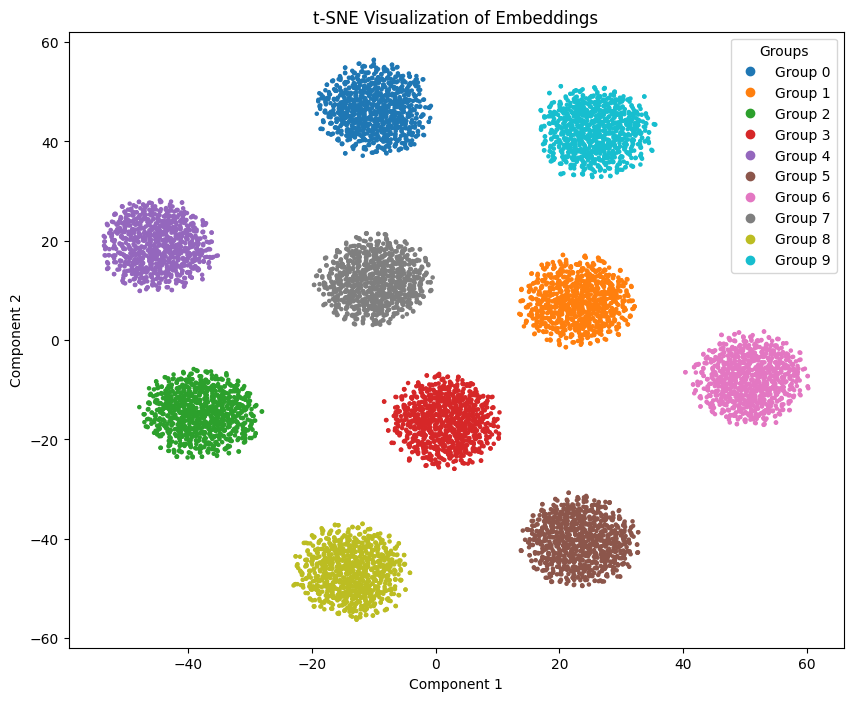

In [33]:
from torch.utils.data import DataLoader, Dataset
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

class ContrastiveDataset(Dataset):
    def __init__(self, n=10000, num_groups=10):
        self.n = n
        self.num_groups = num_groups
        self.range_size = self.n // self.num_groups
        self.ranges = [
            (self.range_size * i, self.range_size * (i + 1)) for i in range(self.num_groups)
        ]

        # Handle any remaining samples by adding them to the last range
        if self.range_size * self.num_groups < self.n:
            self.ranges[-1] = (self.ranges[-1][0], self.n)

        # Assign group labels to each index for visualization
        self.labels = torch.zeros(self.n, dtype=torch.long)
        for i in range(self.num_groups):
            start, end = self.ranges[i]
            self.labels[start:end] = i

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        anchor = idx

        range_idx = anchor // self.range_size
        if range_idx >= self.num_groups:
            range_idx = self.num_groups - 1  # Correct adjustment

        start, end = self.ranges[range_idx]
        positive_sample = torch.randint(start, end, (1,)).item()

        return torch.tensor(anchor, dtype=torch.long), torch.tensor(positive_sample, dtype=torch.long)

class Encoder(torch.nn.Module):
    def __init__(self, n):
        super(Encoder, self).__init__()
        self.embedding = torch.nn.Embedding(n, 768)
        self.fc = torch.nn.Linear(768, 768)
        self.non_linearity = torch.nn.Tanh()

    def forward(self, x):
        emb = self.embedding(x)
        out = self.fc(emb)
        out = self.non_linearity(out)
        return out

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, z_i, z_j):
        batch_size = z_i.size(0)
        device = z_i.device

        # Normalize embeddings
        z_i = torch.nn.functional.normalize(z_i, dim=1)
        z_j = torch.nn.functional.normalize(z_j, dim=1)

        # Compute similarity logits
        logits = torch.matmul(z_i, z_j.T) / self.temperature  # Shape: [batch_size, batch_size]

        labels = torch.arange(batch_size).to(device)

        # Cross-entropy loss along rows
        loss_row = torch.nn.functional.cross_entropy(logits, labels)

        # Cross-entropy loss along columns
        loss_col = torch.nn.functional.cross_entropy(logits.T, labels)

        # Total loss
        loss = (loss_row + loss_col) / 2

        return loss

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the encoder and move it to the device
encoder = Encoder(10000).to(device)

# Define the optimizer
optimizer = torch.optim.Adam(encoder.parameters(), lr=1e-3)

# Initialize the loss function
criterion = ContrastiveLoss().to(device)

# Initialize the dataset
dataset = ContrastiveDataset()

# Initialize DataLoader
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=0)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    encoder.train()  # Set the encoder to training mode
    total_loss = 0
    for batch_idx, (anchors, positives) in enumerate(dataloader):
        # Move data to device
        anchors = anchors.to(device)
        positives = positives.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        z_i = encoder(anchors)
        z_j = encoder(positives)

        # Compute loss
        loss_value = criterion(z_i, z_j)

        # Backward pass and optimization
        loss_value.backward()
        optimizer.step()

        total_loss += loss_value.item()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# After training, encode all 10,000 indices
encoder.eval()  # Set the encoder to evaluation mode

# Generate indices from 0 to 9999
all_indices = torch.arange(0, 10000, dtype=torch.long).to(device)

# Get embeddings
with torch.no_grad():
    embeddings = encoder(all_indices).cpu().numpy()  # Move embeddings to CPU and convert to NumPy array

# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Get labels for color-coding
labels = dataset.labels.numpy()

# Plot the embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab10', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Group {i}' for i in range(dataset.num_groups)], title='Groups')
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


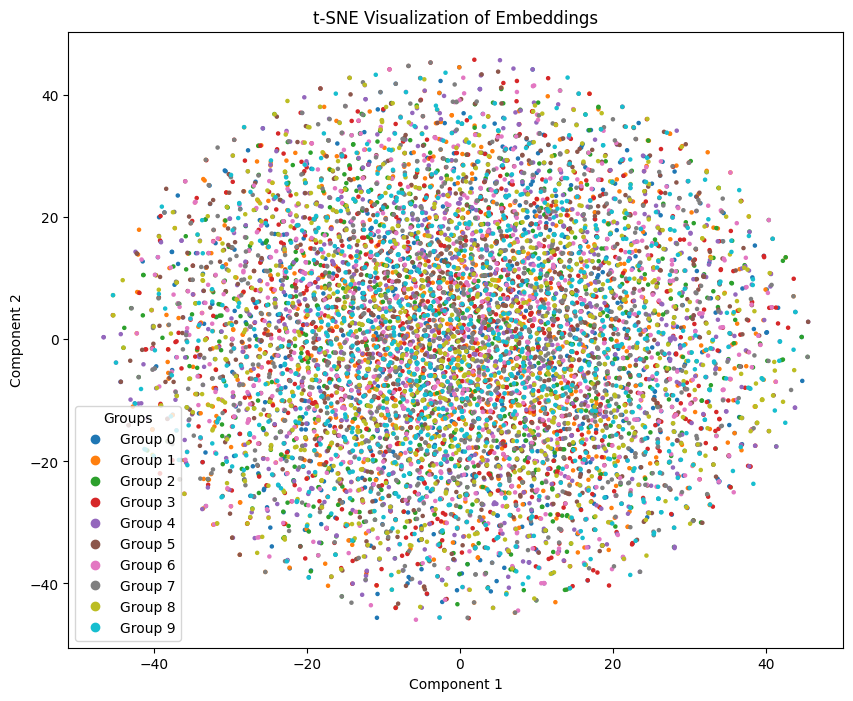

In [34]:
from torch.utils.data import DataLoader, Dataset
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

class ContrastiveDataset(Dataset):
    def __init__(self, n=10000, num_groups=10):
        self.n = n
        self.num_groups = num_groups
        self.range_size = self.n // self.num_groups
        self.ranges = [
            (self.range_size * i, self.range_size * (i + 1)) for i in range(self.num_groups)
        ]

        # Handle any remaining samples by adding them to the last range
        if self.range_size * self.num_groups < self.n:
            self.ranges[-1] = (self.ranges[-1][0], self.n)

        # Assign group labels to each index for visualization
        self.labels = torch.zeros(self.n, dtype=torch.long)
        for i in range(self.num_groups):
            start, end = self.ranges[i]
            self.labels[start:end] = i

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        anchor = idx

        range_idx = anchor // self.range_size
        if range_idx >= self.num_groups:
            range_idx = self.num_groups - 1  # Correct adjustment

        start, end = self.ranges[range_idx]
        positive_sample = torch.randint(start, end, (1,)).item()

        return torch.tensor(anchor, dtype=torch.long), torch.tensor(positive_sample, dtype=torch.long)

class Encoder(torch.nn.Module):
    def __init__(self, n):
        super(Encoder, self).__init__()
        self.embedding = torch.nn.Embedding(n, 768)
        self.fc = torch.nn.Linear(768, 768)
        self.non_linearity = torch.nn.Tanh()

    def forward(self, x):
        emb = self.embedding(x)
        out = self.fc(emb)
        out = self.non_linearity(out)
        return out

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, z_i, z_j):
        batch_size = z_i.size(0)
        device = z_i.device

        # Normalize embeddings
        z_i = torch.nn.functional.normalize(z_i, dim=1)
        z_j = torch.nn.functional.normalize(z_j, dim=1)

        # Compute similarity logits
        logits = torch.matmul(z_i, z_j.T) / self.temperature  # Shape: [batch_size, batch_size]

        labels = torch.arange(batch_size).to(device)

        # Cross-entropy loss along rows
        loss_row = torch.nn.functional.cross_entropy(logits, labels)

        # Cross-entropy loss along columns
        loss_col = torch.nn.functional.cross_entropy(logits.T, labels)

        # Total loss
        loss = (loss_row + loss_col) / 2

        return loss

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the encoder and move it to the device
encoder = Encoder(10000).to(device)

# Define the optimizer
optimizer = torch.optim.Adam(encoder.parameters(), lr=1e-3)

# Initialize the loss function
criterion = ContrastiveLoss().to(device)

# Initialize the dataset
dataset = ContrastiveDataset()

# Initialize DataLoader
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=0)

encoder.eval()  # Set the encoder to evaluation mode

# Generate indices from 0 to 9999
all_indices = torch.arange(0, 10000, dtype=torch.long).to(device)

# Get embeddings
with torch.no_grad():
    embeddings = encoder(all_indices).cpu().numpy()  # Move embeddings to CPU and convert to NumPy array

# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Get labels for color-coding
labels = dataset.labels.numpy()

# Plot the embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab10', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Group {i}' for i in range(dataset.num_groups)], title='Groups')
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
